### Data Cleaning

In [1]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import os

def get_images(directory):
    """
    Returns a list of image paths in the given directory.

    Parameters:
    - directory: Directory to the images.

    Returns:
    - List of image paths.
    """
    images = []

    # Iterate through each file in the directory
    for image_file in sorted(os.listdir(directory)):
        # Check if the file has a valid image extension
        if image_file.endswith(('.jpg', '.jpeg')):
            # Create the full path to the image
            image_path = os.path.join(directory, image_file)
            # Add the image path to the list
            images.append(image_path)

    return images

In [2]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

def get_labels(image_paths):
    """
    Returns a list of labels based on the given image paths.

    Parameters:
    - image_paths: List of image paths.

    Returns:
    - List of corresponding labels.
    """
    # Define ranges for each person's images
    label_ranges = {
        0: range(1, 2501),  # Edith
        1: range(2501, 5001),  # Noni
        2: range(5001, 7501),  # Aroma
        3: range(7501, 10001)  # Macbeth
    }

    labels = []

    # Extract image numbers from image paths and determine labels
    for image_path in image_paths:
        # Extract the image number from the filename
        image_number = int(os.path.splitext(os.path.basename(image_path))[0])

        # Determine the label based on the image number
        person_label = None
        for person, number_range in label_ranges.items():
            if image_number in number_range:
                person_label = person
                break

        # If the image number doesn't fall into any range, skip it
        if person_label is not None:
            labels.append(person_label)

    return labels

In [3]:
import os
import shutil

# Function to move files within specified ranges
def move_files_within_ranges(src_dir, dest_dir, ranges):
    """
    Move files from the source directory to the destination directory based on specified ranges.

    Parameters:
    - src_dir (str): The source directory containing the files to be moved.
    - dest_dir (str): The destination directory where the files will be moved to.
    - ranges (list of tuples): A list of tuples representing the inclusive ranges of file indices to be moved.
      Each tuple should contain two integers, indicating the start and end indices of the range.

    Returns:
    - None
    """
    for start, end in ranges:
        for i in range(start, end + 1):
            file_name = f"{i:04d}.jpg" 
            # source path to image
            src_path = os.path.join(src_dir, file_name)
            # destination path for image
            dest_path = os.path.join(dest_dir, file_name)
            shutil.move(src_path, dest_path)
            print(f"Moved {file_name} to {dest_dir}")

In [4]:
# Set the source and destination directories
images_directory = "/Users/edithngundi/Downloads/FacesImages"

# Destination directory for DenseNet169 dataset
short_dataset1 = "/Users/edithngundi/Downloads/shorter_dataset1"
# Destination directory for ResNet152 dataset
short_dataset2 = "/Users/edithngundi/Downloads/shorter_dataset2"
# Destination directory for VGG19 dataset
short_dataset3 = "/Users/edithngundi/Downloads/shorter_dataset3"

# Image name ranges for DenseNet169 dataset
ranges_to_move1 = [(1, 500), (2501, 3000), (5001, 5500), (7501, 8000)]
# Image name ranges for ResNet152 dataset
ranges_to_move2 = [(501, 1000), (3001, 3500), (5501, 6000), (8001, 8500)]
# Image name ranges for VGG19 dataset
ranges_to_move3 = [(1001, 1500), (3501, 4000), (6001, 6500), (8501, 9000)]

In [ ]:
# Create shorter_dataset1 locally
os.makedirs(short_dataset1, exist_ok=True)
# Move files within specified ranges
move_files_within_ranges(images_directory, short_dataset1, ranges_to_move1)

In [ ]:
# Create shorter_dataset2 locally
os.makedirs(short_dataset2, exist_ok=True)
# Move files within specified ranges
move_files_within_ranges(images_directory, short_dataset2, ranges_to_move2)

In [ ]:
# Create shorter_dataset3 locally
os.makedirs(short_dataset3, exist_ok=True)
# Move files within specified ranges
move_files_within_ranges(images_directory, short_dataset3, ranges_to_move3)

In [9]:
# Set up variables for shorter_dataset1
images_directory1 = "/Users/edithngundi/Downloads/shorter_dataset1"
image_paths1 = get_images(images_directory1)
image_labels1 = get_labels(image_paths1)

# Set up variables for shorter_dataset2
images_directory2 = "/Users/edithngundi/Downloads/shorter_dataset2"
image_paths2 = get_images(images_directory2)
image_labels2 = get_labels(image_paths2)

# Set up variables for shorter_dataset3
images_directory3 = "/Users/edithngundi/Downloads/shorter_dataset3"
image_paths3 = get_images(images_directory3)
image_labels3 = get_labels(image_paths3)

### Exploratory Analysis

In [10]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import numpy as np
import pandas as pd

def create_dataframe(directory):
    """
    Creates a dataframe of the image paths and their corresponding labels.

    Parameters:
    - directory: Directory to the images.

    Returns:
    - Dataframe of the images.
    """
    # Get image paths and labels using helper functions
    image_paths = get_images(directory)
    labels = get_labels(image_paths)

    # Create a dataframe
    dataframe = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    }, index=np.arange(1, len(image_paths) + 1))

    return dataframe

# Create the Dataframe1
df1 = create_dataframe(images_directory1)
df1

,image_path,label
1,/Users/edithngundi/Downloads/shorter_dataset1/...,0
2,/Users/edithngundi/Downloads/shorter_dataset1/...,0
3,/Users/edithngundi/Downloads/shorter_dataset1/...,0
4,/Users/edithngundi/Downloads/shorter_dataset1/...,0
5,/Users/edithngundi/Downloads/shorter_dataset1/...,0
...,...,...
1996,/Users/edithngundi/Downloads/shorter_dataset1/...,3
1997,/Users/edithngundi/Downloads/shorter_dataset1/...,3
1998,/Users/edithngundi/Downloads/shorter_dataset1/...,3
1999,/Users/edithngundi/Downloads/shorter_dataset1/...,3


In [11]:
# Create the Dataframe2
df2 = create_dataframe(images_directory2)
df2

,image_path,label
1,/Users/edithngundi/Downloads/shorter_dataset2/...,0
2,/Users/edithngundi/Downloads/shorter_dataset2/...,0
3,/Users/edithngundi/Downloads/shorter_dataset2/...,0
4,/Users/edithngundi/Downloads/shorter_dataset2/...,0
5,/Users/edithngundi/Downloads/shorter_dataset2/...,0
...,...,...
1996,/Users/edithngundi/Downloads/shorter_dataset2/...,3
1997,/Users/edithngundi/Downloads/shorter_dataset2/...,3
1998,/Users/edithngundi/Downloads/shorter_dataset2/...,3
1999,/Users/edithngundi/Downloads/shorter_dataset2/...,3


In [12]:
# Create the Dataframe3
df3 = create_dataframe(images_directory3)
df3

,image_path,label
1,/Users/edithngundi/Downloads/shorter_dataset3/...,0
2,/Users/edithngundi/Downloads/shorter_dataset3/...,0
3,/Users/edithngundi/Downloads/shorter_dataset3/...,0
4,/Users/edithngundi/Downloads/shorter_dataset3/...,0
5,/Users/edithngundi/Downloads/shorter_dataset3/...,0
...,...,...
1996,/Users/edithngundi/Downloads/shorter_dataset3/...,3
1997,/Users/edithngundi/Downloads/shorter_dataset3/...,3
1998,/Users/edithngundi/Downloads/shorter_dataset3/...,3
1999,/Users/edithngundi/Downloads/shorter_dataset3/...,3


In [13]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import random
from PIL import Image

# Display a few random images with corresponding labels
def display_images(images, labels, number):
    """
    Display some random images along with their labels.

    Parameters:
    - images: List of image paths to be displayed.
    - labels: List of corresponding labels for the images.
    - number: Number of random images to display.
    """

    # Set the number of rows and columns for subplots
    rows = 1
    cols = number

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2))

    for i in range(number):
        # Random selection of images
        index = random.randint(0, len(images) - 1)

        # Read the image using PIL
        image = Image.open(images[index])

        # Display the image
        axes[i].imshow(image)

        # Map label to a corresponding name
        name = ''
        if labels[index] == 0:
            name = 'Edith'
        elif labels[index] == 1:
            name = 'Noni'
        elif labels[index] == 2:
            name = 'Aroma'
        elif labels[index] == 3:
            name = 'Macbeth'

        # Display images
        axes[i].set_title(f'Who is this? {name}')
        axes[i].axis('off')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Set the number of images to be displayed
number = 10

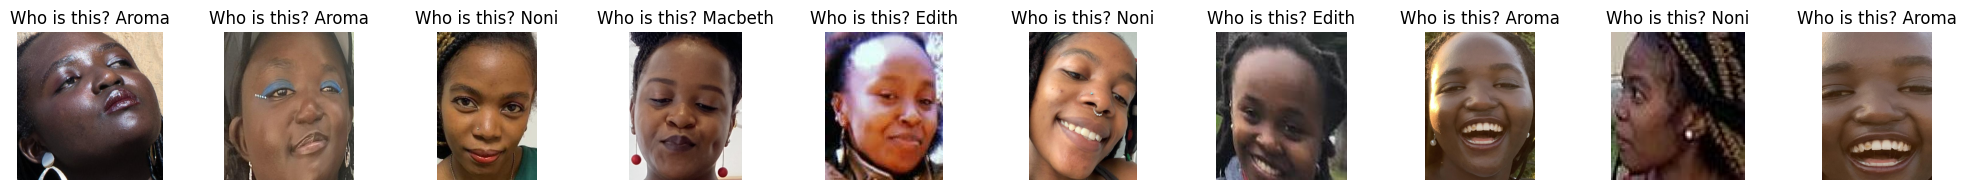

In [14]:
# Dataframe1
df1 = create_dataframe(images_directory1)
# Extract the 'image_path' column
images1 = df1['image_path'].values
# Extract the 'label' column
labels1 = df1['label'].values
# Display images
display_images(images1, labels1, number)

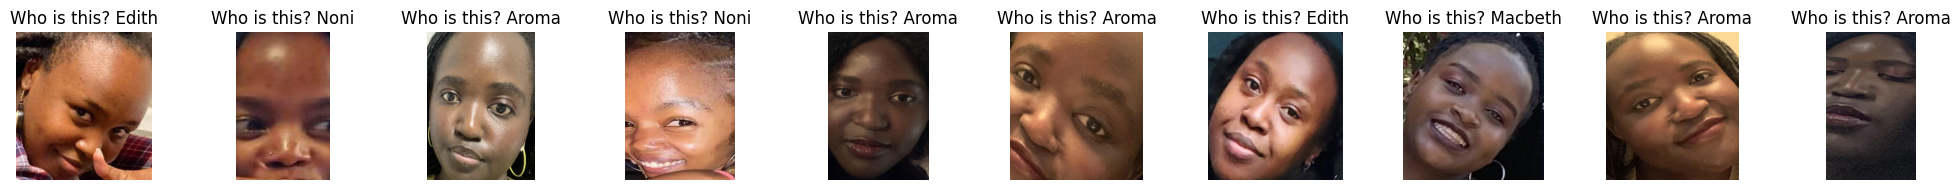

In [15]:
# Dataframe2
df2 = create_dataframe(images_directory2)
# Extract the 'image_path' column
images2 = df2['image_path'].values
# Extract the 'label' column
labels2 = df2['label'].values
# Display images
display_images(images2, labels2, number)

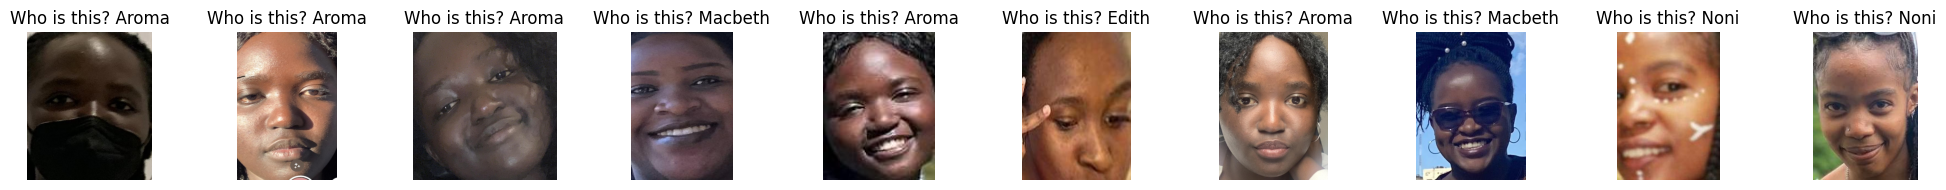

In [16]:
# Dataframe3
df3 = create_dataframe(images_directory3)
# Extract the 'image_path' column
images3 = df3['image_path'].values
# Extract the 'label' column
labels3 = df3['label'].values
# Display images
display_images(images3, labels3, number)

/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


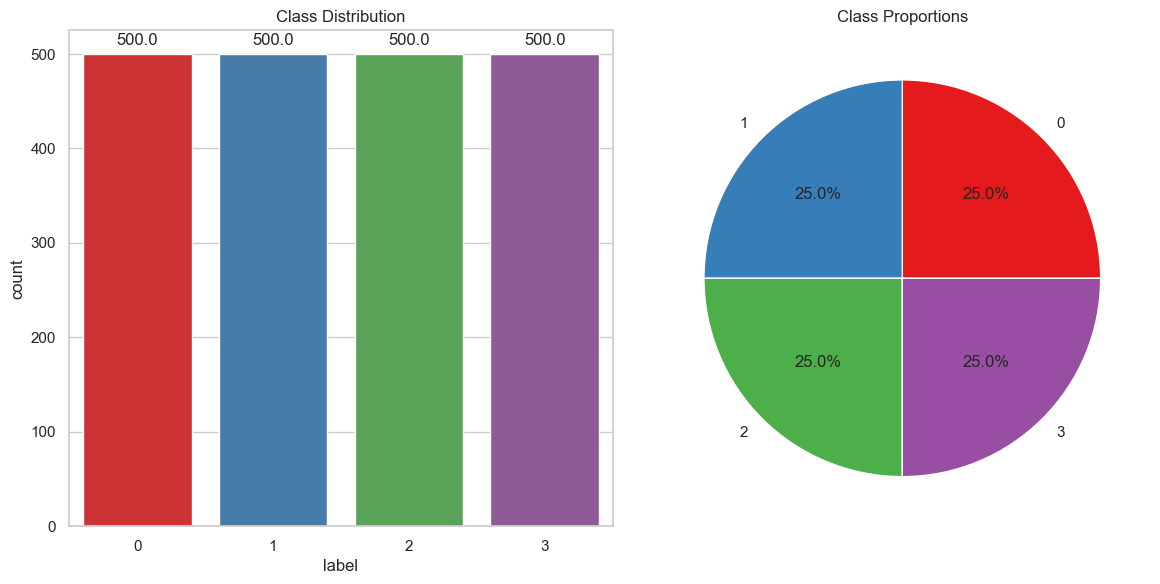

In [22]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import seaborn as sns

# Choose display style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Bar graph for class distribution
x = sns.countplot(x='label', data=df1, palette='Set1')
for person in x.patches:
    x.annotate(f'{person.get_height()}', (person.get_x() + person.get_width() / 2., person.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Class Distribution')

# Pie chart for class distribution
plt.subplot(1, 2, 2)
counts = df1['label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Class Proportions')

# Display plot
plt.tight_layout()
plt.show()

/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


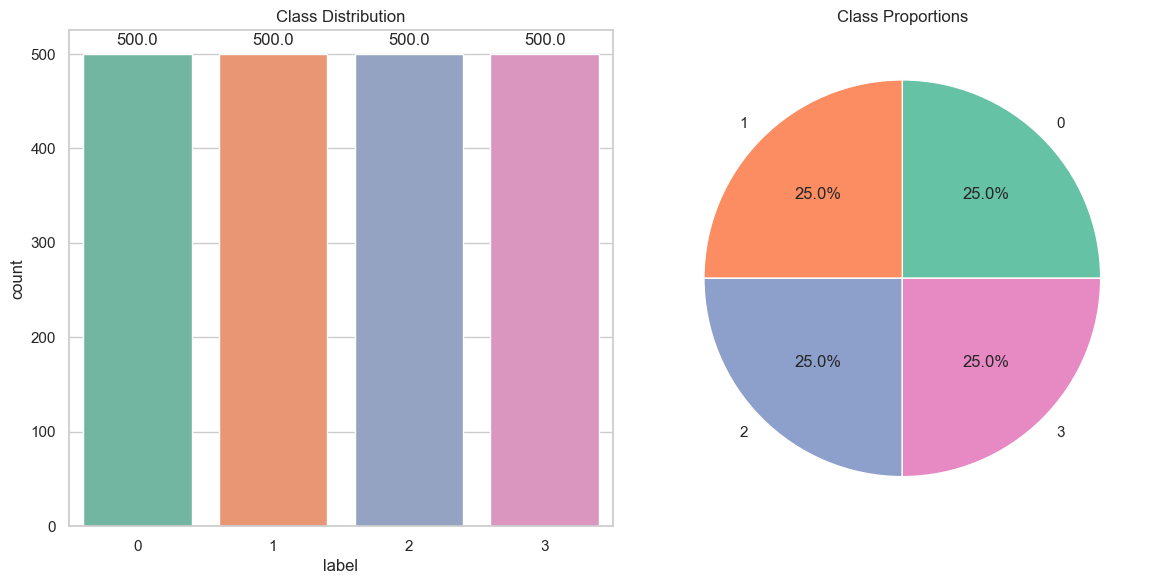

In [21]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import seaborn as sns

# Choose display style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Bar graph for class distribution
x = sns.countplot(x='label', data=df2, palette='Set2')
for person in x.patches:
    x.annotate(f'{person.get_height()}', (person.get_x() + person.get_width() / 2., person.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Class Distribution')

# Pie chart for class distribution
plt.subplot(1, 2, 2)
counts = df2['label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Class Proportions')

# Display plot
plt.tight_layout()
plt.show()

/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edithngundi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


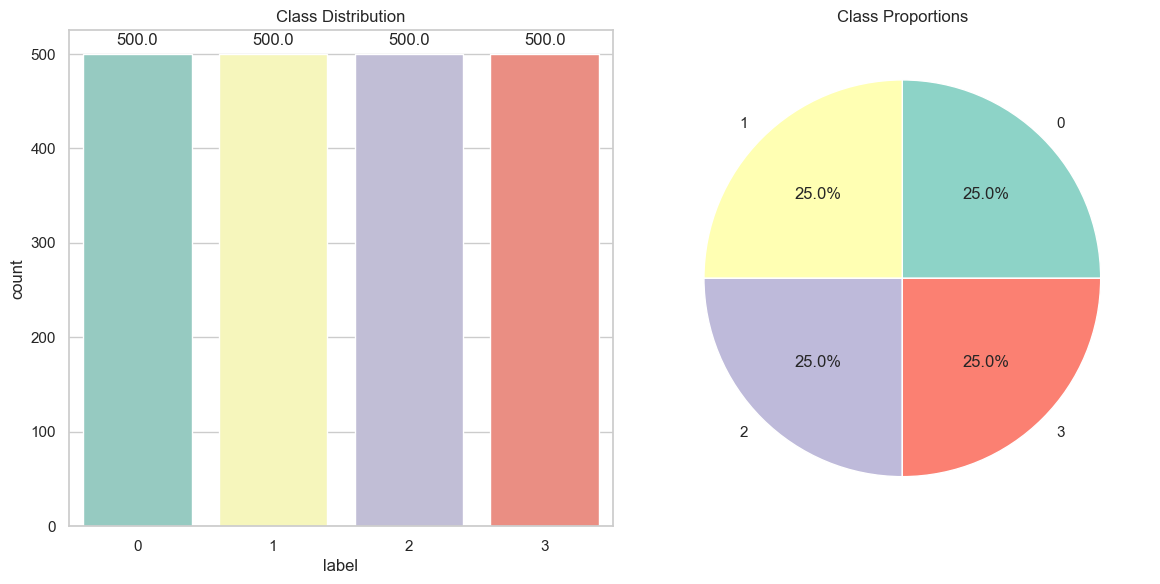

In [23]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import seaborn as sns

# Choose display style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Bar graph for class distribution
x = sns.countplot(x='label', data=df3, palette='Set3')
for person in x.patches:
    x.annotate(f'{person.get_height()}', (person.get_x() + person.get_width() / 2., person.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Class Distribution')

# Pie chart for class distribution
plt.subplot(1, 2, 2)
counts = df3['label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Class Proportions')

# Display plot
plt.tight_layout()
plt.show()

### Data Conversion and Pre-processing

In [24]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import cv2

def preprocess_images(directory, target_size):
    """
    Preprocess images from a list of file paths.

    Parameters:
    - directory: Directory to the images.
    - target_size: Tuple representing the desired size of the images (height, width).

    Returns:
    - List of preprocessed images.
    """

    # List to store preprocessed_images
    preprocessed_images = []

    # Initialize variables for mean and standard deviation calculation
    mean_sum = np.zeros(3)
    std_sum = np.zeros(3)
    count = 0

    # Get image paths
    image_paths = get_images(directory)

    # Iterate through image paths
    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)
        # Check if the image is readable
        if image is None:
            print(f"Error reading image: {image_path}")
            continue  # Skip to the next iteration
        # Check if there is an image
        if image.size == 0:
            print(f"Error: Empty image - {image_path}")
            continue  # Skip to the next iteration
        # Resize the image
        image = cv2.resize(image, target_size)
        # Add the resized images to the list
        preprocessed_images.append(image)

        # Accumulate sums for mean and standard deviation
        mean_sum += np.mean(image, axis=(0, 1))
        std_sum += np.std(image, axis=(0, 1))
        count += 1
    # Calculate the mean and standard deviation
    dataset_mean = mean_sum / count
    dataset_std = std_sum / count

    return preprocessed_images, dataset_mean, dataset_std

# ideal size for the pre-trained models
target_size = (224, 224)

In [27]:
# Preprocessed images from shorter_dataset1
preprocessed_images1, mean1, std1 = preprocess_images(images_directory1, target_size)

In [28]:
# Preprocessed images from shorter_dataset2
preprocessed_images2, mean2, std2 = preprocess_images(images_directory2, target_size)

In [29]:
# Preprocessed images from shorter_dataset3
preprocessed_images3, mean3, std3 = preprocess_images(images_directory3, target_size)

In [30]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import numpy as np

# Function to normalize a list of images
def normalize_images(preprocessed_images, mean, std):
    """
    Normalize a list of images by scaling pixel values to the range [0, 1].

    Parameters:
    - image_paths: List of image paths.

    Returns:
    - NumPy array of normalized images.
    """
    normalized_images = []
    for image in preprocessed_images:
        # Convert the image to a NumPy array and normalize pixel values
        normalized_image = (image - mean) / std
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

### Model 1: Custom Classifier on DenseNet169

In [31]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

from sklearn.model_selection import train_test_split

# Normalized images
image_data1 = normalize_images(preprocessed_images1, mean1, std1)

# Initial split for testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(image_data1, df1['label'], test_size=0.2, random_state=42, stratify=df1['label'])

# Further split the remaining 80% for training and validation (80-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [ ]:
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained DenseNet169 model
base_model_densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Freeze the layers in the pre-trained model to prevent them from being updated during training
for layer in base_model_densenet169.layers:
    layer.trainable = False

# Replace the custom classifier
x_densenet169 = layers.Flatten()(base_model_densenet169.output)
x_densenet169 = layers.Dense(200, activation='relu')(x_densenet169)
output_layer_densenet169 = layers.Dense(4, activation='softmax')(x_densenet169)  #4 classes (Edith, Noni, Aroma, Macbeth)

# Create the new model
model_densenet169 = models.Model(inputs=base_model_densenet169.input, outputs=output_layer_densenet169)

# Compile the model
model_densenet169.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_densenet169.summary()

# Define callbacks
checkpoint_densenet169 = ModelCheckpoint('densenet169_best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history_densenet169 = model_densenet169.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[checkpoint_densenet169])

# Evaluate the model on the test set
test_loss_densenet169, test_accuracy_densenet169 = model_densenet169.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_densenet169 * 100:.2f}%")

# You can load the best weights back to the model
model_densenet169.load_weights('densenet169_best_model.h5')

### Model 1 Perfomance Evaluation and Visualization

In [52]:
import tensorflow as tf
# Get the model predictions on the test set
predictions_test = model_densenet169.predict(X_test)

# Get the predicted classes
y_pred_classes_test = predictions_test.argmax(axis=-1)

# Convert true labels to one-hot encoding
y_true_one_hot_test = tf.one_hot(y_test, depth=4)

# Calculate precision and recall on the test set
precision_test = tf.keras.metrics.Precision()(y_true_one_hot_test, predictions_test).numpy()
recall_test = tf.keras.metrics.Recall()(y_true_one_hot_test, predictions_test).numpy()

print(f"Precision on Test Set: {precision_test * 100:.2f}%")
print(f"Recall on Test Set: {recall_test * 100:.2f}%")

13/13 [==============================] - 30s 2s/step
Precision on Test Set: 85.75%
Recall on Test Set: 82.75%


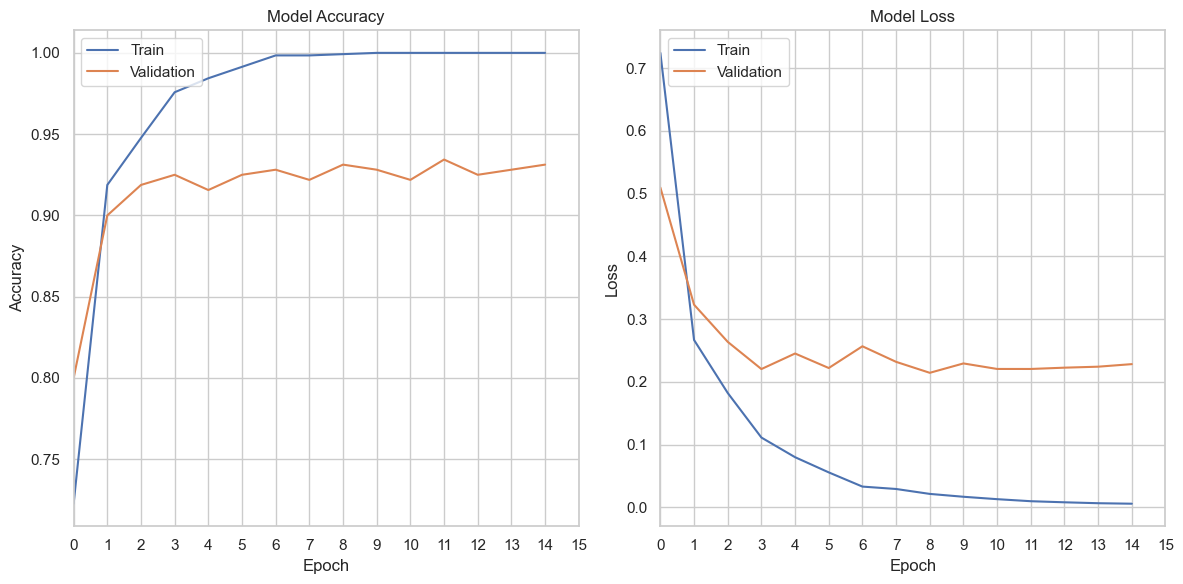

In [40]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, len(history.history['accuracy']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['accuracy']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(history.history['loss']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['loss']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# plot the densenet169 model history
plot_history(history_densenet169)

### Model 1 Predictions

13/13 [==============================] - 28s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


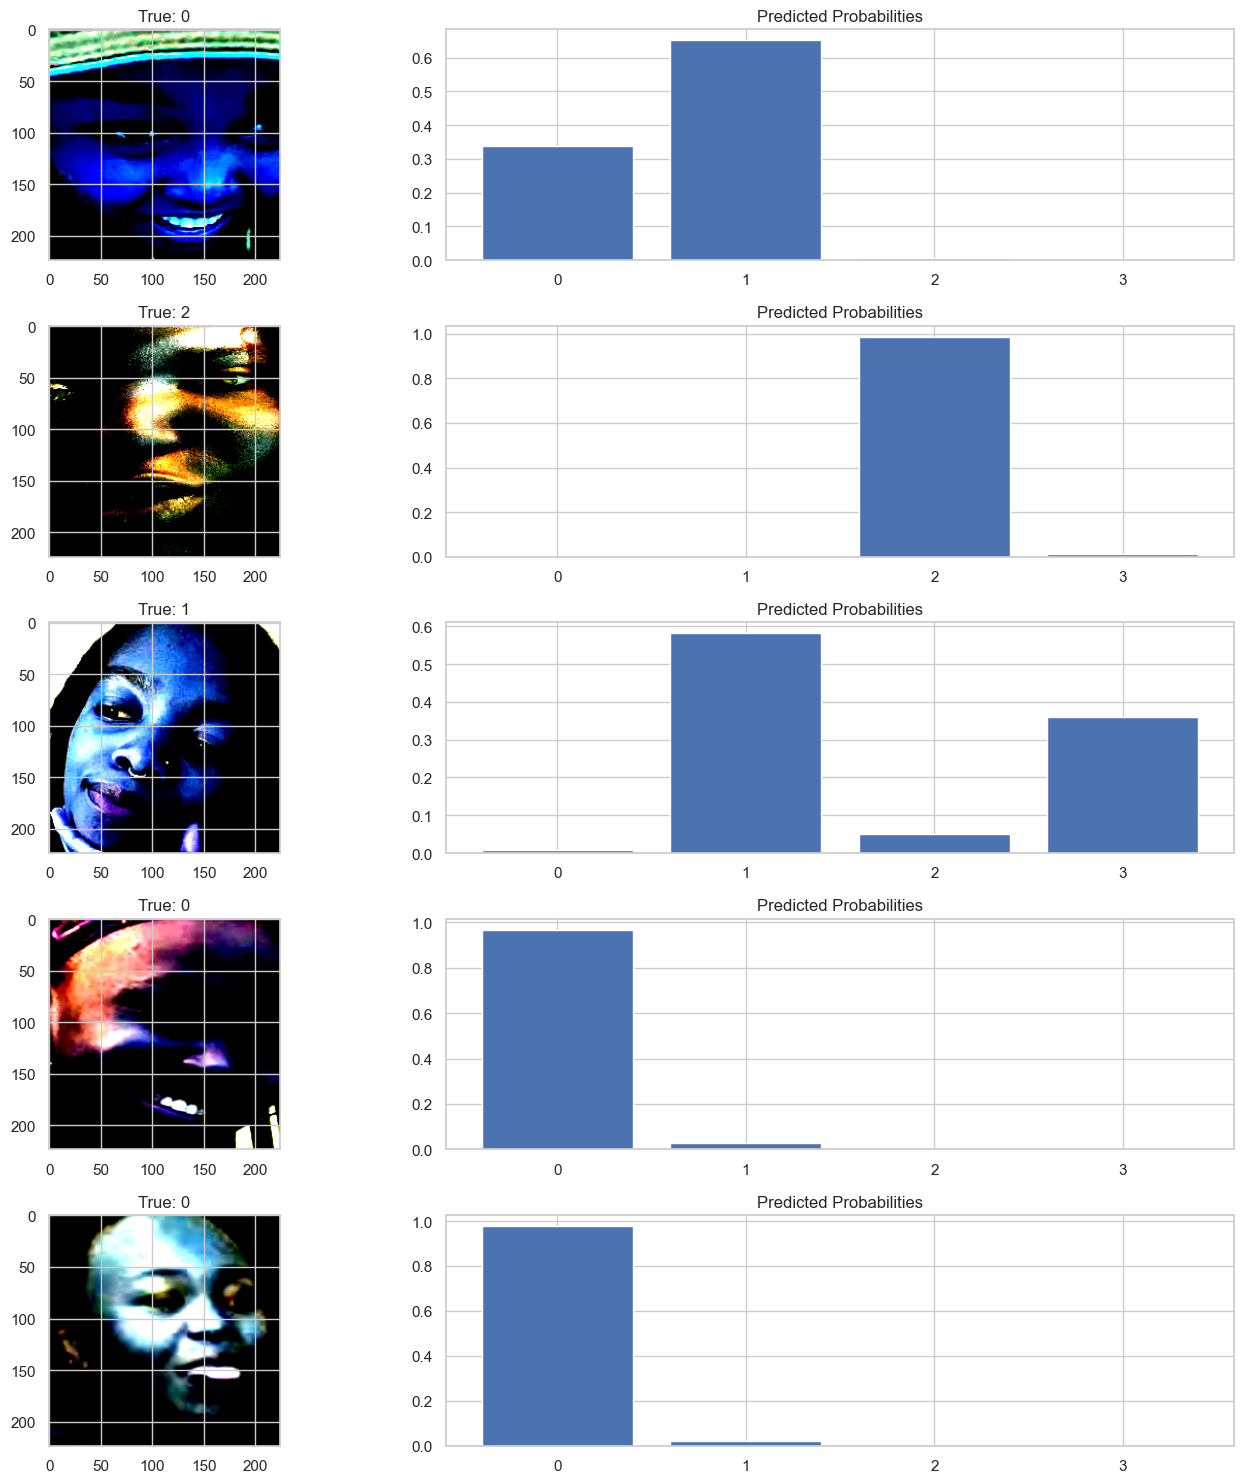

In [66]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test, y_test, num_samples=5):
    # Generate predictions
    y_pred = model.predict(X_test)

    classes = 4

    # Randomly select num_samples samples
    sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

    plt.figure(figsize=(15, 3 * num_samples))

    for i, sample_index in enumerate(sample_indices, 1):
        plt.subplot(num_samples, 2, 2 * i - 1)
        plt.imshow(X_test[sample_index])
        plt.title(f"True: {y_test[sample_index]}")

        plt.subplot(num_samples, 2, 2 * i)
        plt.bar(range(classes), y_pred[sample_index], tick_label=range(classes))
        plt.title("Predicted Probabilities")

    plt.tight_layout()
    plt.show()

# y_test is a pandas DataFrame
y_test_array = y_test.values 

# Now y_test_array is a NumPy array or list
visualize_predictions(model_densenet169, X_test, y_test_array)

### Model 2: Custom Classifier on ResNet152

In [41]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

from sklearn.model_selection import train_test_split

# Normalized images
image_data2 = normalize_images(preprocessed_images2, mean2, std2)

# Initial split for testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(image_data2, df2['label'], test_size=0.2, random_state=42, stratify=df2['label'])

# Further split the remaining 80% for training and validation (80-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [ ]:
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained ResNet152 model
base_model_resnet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Freeze the layers in the pre-trained model to prevent them from being updated during training
for layer in base_model_resnet152.layers:
    layer.trainable = False

# Replace the custom classifier
x_resnet152 = layers.Flatten()(base_model_resnet152.output)
x_resnet152 = layers.Dense(200, activation='relu')(x_resnet152)
output_layer_resnet152 = layers.Dense(4, activation='softmax')(x_resnet152)  # 4 classes (Edith, Noni, Aroma, Macbeth)

# Create the new model
model_resnet152 = models.Model(inputs=base_model_resnet152.input, outputs=output_layer_resnet152)

# Compile the model
model_resnet152.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_resnet152.summary()

# Define callbacks
checkpoint_resnet152 = ModelCheckpoint('resnet152_best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history_resnet152 = model_resnet152.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[checkpoint_resnet152])

# Evaluate the model on the test set
test_loss_resnet152, test_accuracy_resnet152 = model_resnet152.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_resnet152 * 100:.2f}%")

# Load the best weights back to the model
model_resnet152.load_weights('resnet152_best_model.h5')

### Model 2 Perfomance Evaluation and Visualization

In [53]:
import tensorflow as tf
# Get the model predictions on the test set
predictions_test = model_resnet152.predict(X_test)

# Get the predicted classes
y_pred_classes_test = predictions_test.argmax(axis=-1)

# Convert true labels to one-hot encoding
y_true_one_hot_test = tf.one_hot(y_test, depth=4)

# Calculate precision and recall on the test set
precision_test = tf.keras.metrics.Precision()(y_true_one_hot_test, predictions_test).numpy()
recall_test = tf.keras.metrics.Recall()(y_true_one_hot_test, predictions_test).numpy()

print(f"Precision on Test Set: {precision_test * 100:.2f}%")
print(f"Recall on Test Set: {recall_test * 100:.2f}%")

13/13 [==============================] - 63s 5s/step
Precision on Test Set: 46.41%
Recall on Test Set: 42.00%


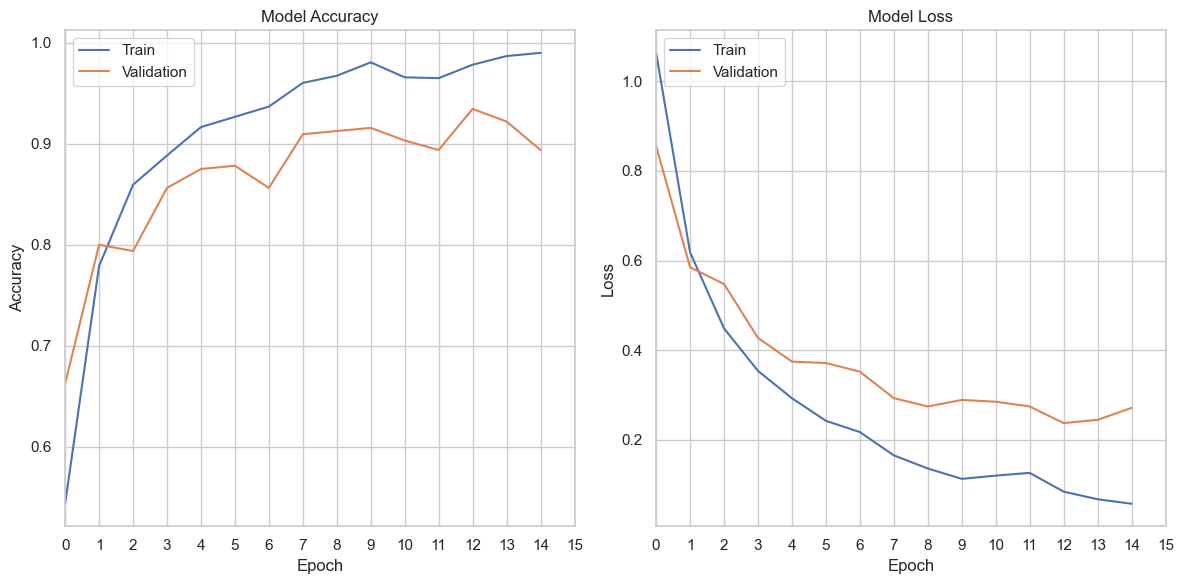

In [44]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, len(history.history['accuracy']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['accuracy']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(history.history['loss']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['loss']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# plot the resnet152 model history
plot_history(history_resnet152)

### Model 2 Predictions

13/13 [==============================] - 78s 6s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


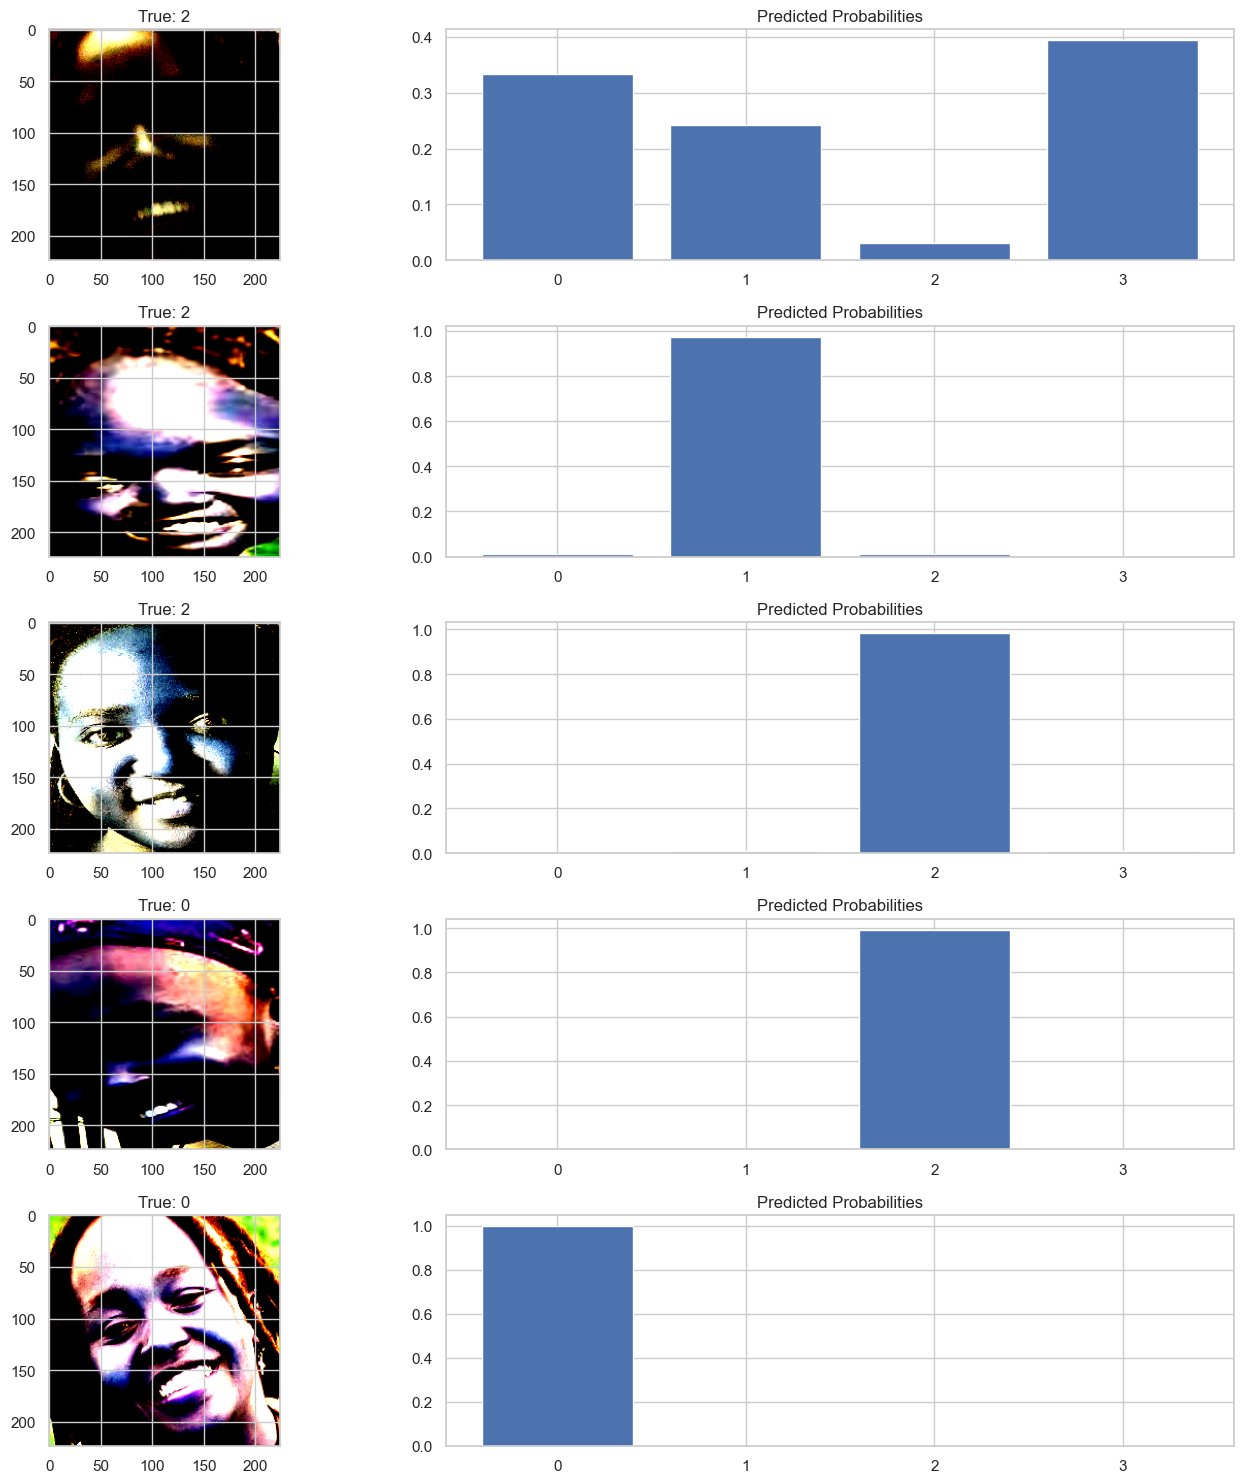

In [60]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test, y_test, num_samples=5):
    # Generate predictions
    y_pred = model.predict(X_test)

    classes = 4

    # Randomly select num_samples samples
    sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

    plt.figure(figsize=(15, 3 * num_samples))

    for i, sample_index in enumerate(sample_indices, 1):
        plt.subplot(num_samples, 2, 2 * i - 1)
        plt.imshow(X_test[sample_index])
        plt.title(f"True: {y_test[sample_index]}")

        plt.subplot(num_samples, 2, 2 * i)
        plt.bar(range(classes), y_pred[sample_index], tick_label=range(classes))
        plt.title("Predicted Probabilities")

    plt.tight_layout()
    plt.show()

# y_test is a pandas DataFrame
y_test_array = y_test.values 

# Now y_test_array is a NumPy array or list
visualize_predictions(model_resnet152, X_test, y_test_array)

### Model 3: Custom Classifier on VGG19

In [45]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

from sklearn.model_selection import train_test_split

# Normalized images
image_data3 = normalize_images(preprocessed_images3, mean3, std3)

# Initial split for testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(image_data3, df3['label'], test_size=0.2, random_state=42, stratify=df3['label'])

# Further split the remaining 80% for training and validation (80-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [ ]:
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained VGG19 model
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Freeze the layers in the pre-trained model to prevent them from being updated during training
for layer in base_model_vgg19.layers:
    layer.trainable = False

# Replace the custom classifier
x_vgg19 = layers.Flatten()(base_model_vgg19.output)
x_vgg19 = layers.Dense(200, activation='relu')(x_vgg19)
output_layer_vgg19 = layers.Dense(4, activation='softmax')(x_vgg19)  # 4 classes (Edith, Noni, Aroma, Macbeth)

# Create the new model
model_vgg19 = models.Model(inputs=base_model_vgg19.input, outputs=output_layer_vgg19)

# Compile the model
model_vgg19.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_vgg19.summary()

# Define callbacks
checkpoint_vgg19 = ModelCheckpoint('vgg19_best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history_vgg19 = model_vgg19.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[checkpoint_vgg19])

# Evaluate the model on the test set
test_loss_vgg19, test_accuracy_vgg19 = model_vgg19.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_vgg19 * 100:.2f}%")

# Load the best weights back to the model
model_vgg19.load_weights('vgg19_best_model.h5')

### Model 3 Perfomance Evaluation and Visualization

In [54]:
import tensorflow as tf
# Get the model predictions on the test set
predictions_test = model_vgg19.predict(X_test)

# Get the predicted classes
y_pred_classes_test = predictions_test.argmax(axis=-1)

# Convert true labels to one-hot encoding
y_true_one_hot_test = tf.one_hot(y_test, depth=4)

# Calculate precision and recall on the test set
precision_test = tf.keras.metrics.Precision()(y_true_one_hot_test, predictions_test).numpy()
recall_test = tf.keras.metrics.Recall()(y_true_one_hot_test, predictions_test).numpy()

print(f"Precision on Test Set: {precision_test * 100:.2f}%")
print(f"Recall on Test Set: {recall_test * 100:.2f}%")

13/13 [==============================] - 104s 8s/step
Precision on Test Set: 98.49%
Recall on Test Set: 98.00%


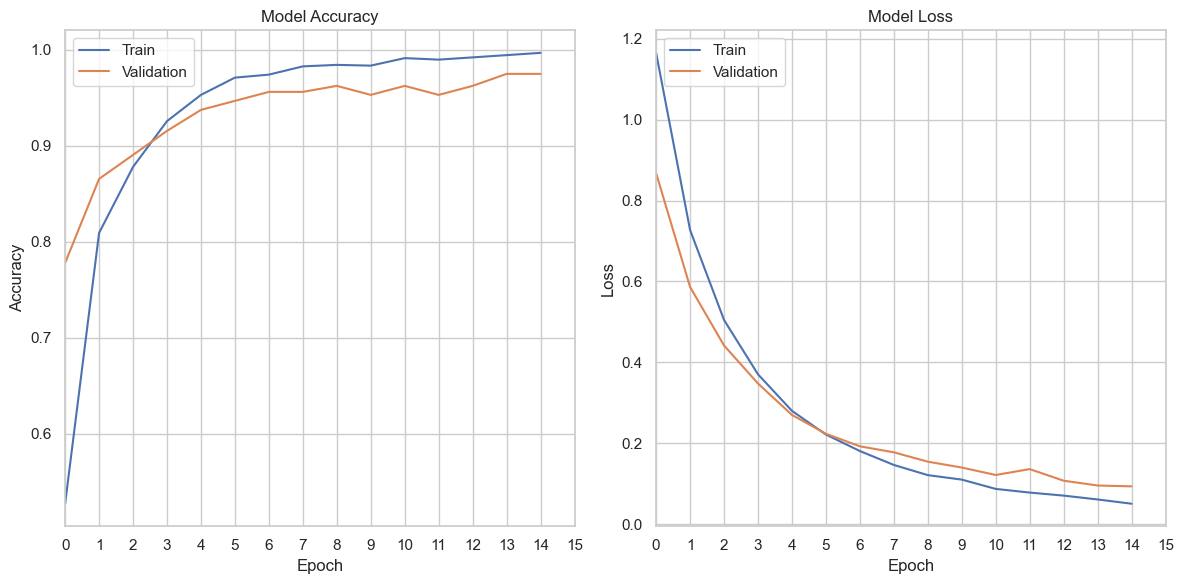

In [47]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, len(history.history['accuracy']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['accuracy']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(history.history['loss']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['loss']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# plot the vgg19 model history
plot_history(history_vgg19)

### Model 3 Predictions

13/13 [==============================] - 119s 9s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


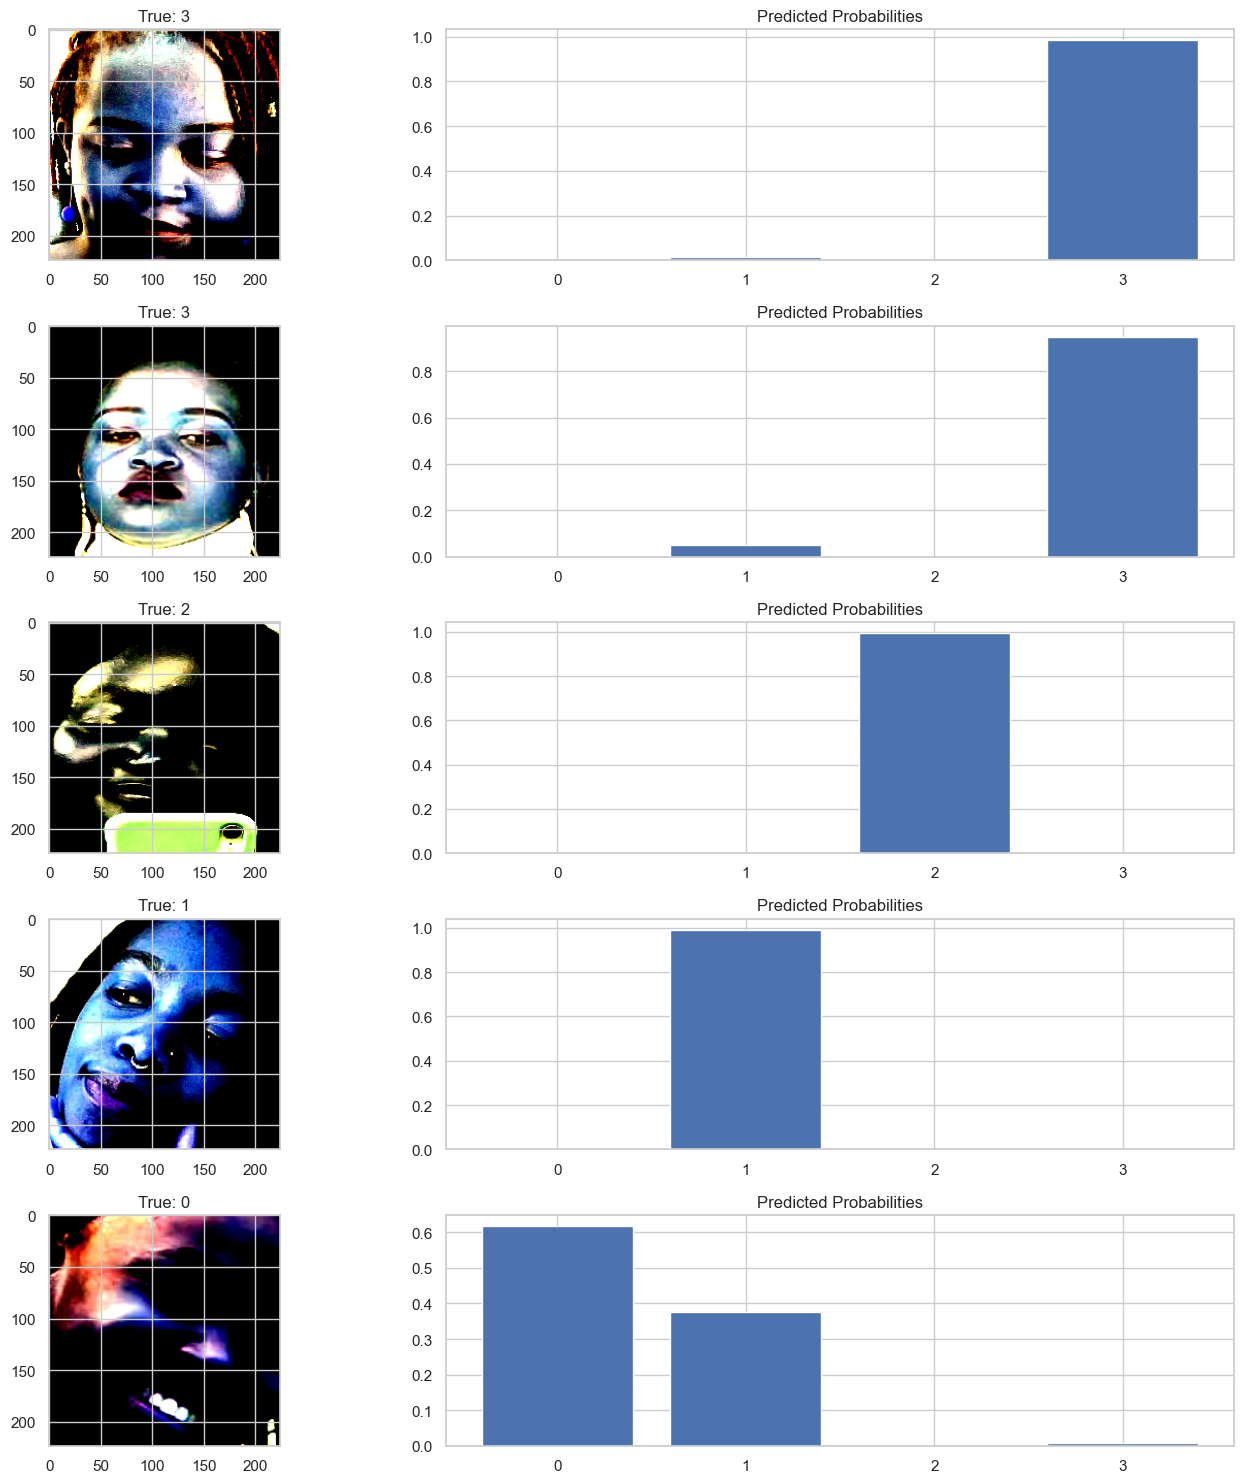

In [58]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test, y_test, num_samples=5):
    # Generate predictions
    y_pred = model.predict(X_test)

    classes = 4

    # Randomly select num_samples samples
    sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

    plt.figure(figsize=(15, 3 * num_samples))

    for i, sample_index in enumerate(sample_indices, 1):
        plt.subplot(num_samples, 2, 2 * i - 1)
        plt.imshow(X_test[sample_index])
        plt.title(f"True: {y_test[sample_index]}")

        plt.subplot(num_samples, 2, 2 * i)
        plt.bar(range(classes), y_pred[sample_index], tick_label=range(classes))
        plt.title("Predicted Probabilities")

    plt.tight_layout()
    plt.show()

# y_test is a pandas DataFrame
y_test_array = y_test.values 

# Now y_test_array is a NumPy array or list
visualize_predictions(model_vgg19, X_test, y_test_array)